## Objective: Predict the house price of a given house based on specific features.

#### Import modules and prepare dataset.

In [15]:
# Import sklearn modules.
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from random import choice
%matplotlib inline

# Import other modules.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time
from IPython.display import display
from scipy.special import expit

dataset = load_boston()    # Predicting boston house prices.

data = dataset.data
target = dataset.target

print(data.shape)
print(target.shape)

# Check for NaN values in data.
print(np.isnan(np.sum(data)))    # -> False

X_train, X_test, y_train, y_test = train_test_split(data, target)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

(506, 13)
(506,)
False
X_train.shape: (379, 13)
y_train.shape: (379,)
X_test.shape: (127, 13)
y_test.shape: (127,)


#### Visualize the data

% of zeros in data -> 12.82%


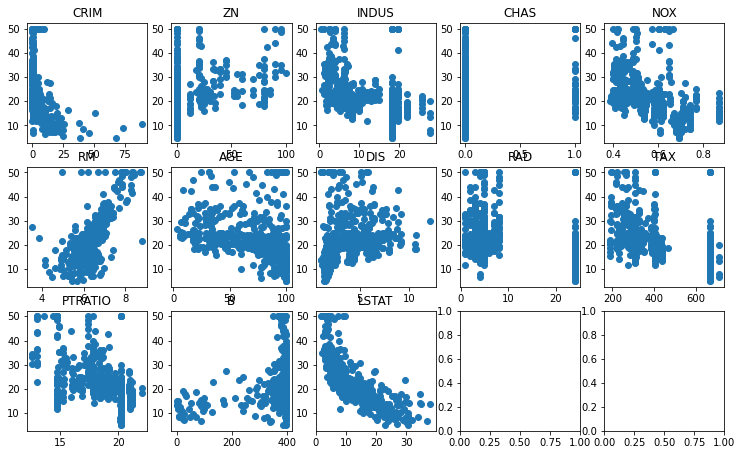

In [16]:
print(f'% of zeros in data -> {(np.sum(data == 0)/data.size)*100:.2f}%')


fig, axs = plt.subplots(3, 5, figsize=(12.5, 7.5))
features = dataset.feature_names

axs = [ax for ax in axs.ravel()]

for i in range(len(features)):
    axs[i].scatter(data[:, i], target)
    axs[i].set_title(features[i])

# NOTE: It seems like the is not much correlation between the target and most features.
#       This means that model should partly eliminate some features
#       so that only the most important features are used.

#### Use linear model on the data.

In [17]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)

lin_pred_train = linreg.predict(X_train)
lin_pred_test = linreg.predict(X_test)

print(f'Train MSE: {mean_squared_error(y_train, lin_pred_train)}')
print(f'Test MSE: {mean_squared_error(y_test, lin_pred_test)}')
print(f'Train R^2 Score: {r2_score(y_train, lin_pred_train)}')
print(f'Test R^2 Score: {r2_score(y_test, lin_pred_test)}')

Train MSE: 22.921832413356487
Test MSE: 19.913015882536268
Train R^2 Score: 0.7249681077899688
Test R^2 Score: 0.7706959273902373


#### Use different algorithm that will generalize to the data better

In [20]:
# Edit data to make features polynomial.
quadratic = PolynomialFeatures()

X_train_poly = quadratic.fit_transform(X_train)
X_test_poly = quadratic.transform(X_test)

lasso = Ridge(alpha=50)

lasso.fit(X_train_poly, y_train)

# NOTE: The reason why we use polynomial features is because the features that are 
#       somewhat correlated to the target variable appear to be better fit through
#       a polynomial model.

lasso_pred_train = lasso.predict(X_train_poly)
lasso_pred_test = lasso.predict(X_test_poly)

print(f'Train MSE: {mean_squared_error(y_train, lasso_pred_train)}')
print(f'Test MSE: {mean_squared_error(y_test, lasso_pred_test)}')
print(f'Train R^2 Score: {r2_score(y_train, lasso_pred_train)}')
print(f'Test R^2 Score: {r2_score(y_test, lasso_pred_test)}')

Train MSE: 9.033396548745705
Test MSE: 11.307913610341528
Train R^2 Score: 0.8916111024161663
Test R^2 Score: 0.8697861409408758


#### View the results of the algorithm

In [12]:
sample_target = choice(y_test)
sample_index = np.where(y_test == sample_target)

sample_pred = np.mean(linreg.predict(X_test[sample_index]))

print(f'Predicted Price: {sample_pred:.1f}')
print(f'Target Price: {sample_target}')


Predicted Price: 23.0
Target Price: 18.9


#### Plot the results

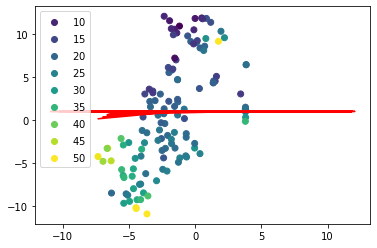

In [13]:
X_test_trans = tsne.fit_transform(X_test)

m = sorted(linreg.coef_, reverse=True)[:2]    # Getting the two most important coefficients.
b = linreg.intercept_
loss = expit(X_test_trans * m + b)
scatter = plt.scatter(X_test_trans[:, 0], X_test_trans[:, 1], c=y_test)
plt.plot(X_test_trans, loss, c='red')
plt.legend(*scatter.legend_elements())